In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    'desktop/Dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    'desktop/Dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

print(train_generator.class_indices)



Found 711 images belonging to 6 classes.
Found 174 images belonging to 6 classes.
{'Bird-drop': 0, 'Clean': 1, 'Dusty': 2, 'Electrical-damage': 3, 'Physical-Damage': 4, 'Snow-Covered': 5}


In [8]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dense(6, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)

for layer in base_model.layers:
    layer.trainable = False  # Freeze base layers initially

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,587,462 (9.87 MB)

 Trainable params: 329,478 (1.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [9]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15
)


Epoch 1/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 163s 6s/step - accuracy: 0.4937 - loss: 1.4165 - val_accuracy: 0.6609 - val_loss: 0.9696
Epoch 2/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 100s 4s/step - accuracy: 0.7159 - loss: 0.8246 - val_accuracy: 0.7241 - val_loss: 0.7810
Epoch 3/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 98s 4s/step - accuracy: 0.7595 - loss: 0.6901 - val_accuracy: 0.7816 - val_loss: 0.6470
Epoch 4/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 73s 3s/step - accuracy: 0.7454 - loss: 0.6661 - val_accuracy: 0.7471 - val_loss: 0.6451
Epoch 5/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 95s 4s/step - accuracy: 0.7932 - loss: 0.6091 - val_accuracy: 0.7299 - val_loss: 0.7162
Epoch 6/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 90s 4s/step - accuracy: 0.8087 - loss: 0.5880 - val_accuracy: 0.8218 - val_loss: 0.6023
Epoch 7/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 96s 4s/step - accuracy: 0.8087 - loss: 0.5285 - val_accuracy: 0.7701 - val_loss: 0.6813
Epoch 8/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 90s 4s/step - accuracy: 0.8298 - loss: 0.4533 - val_accuracy: 0.7644 - val_los

In [10]:
model.save('solar_fault_detection_model.h5')


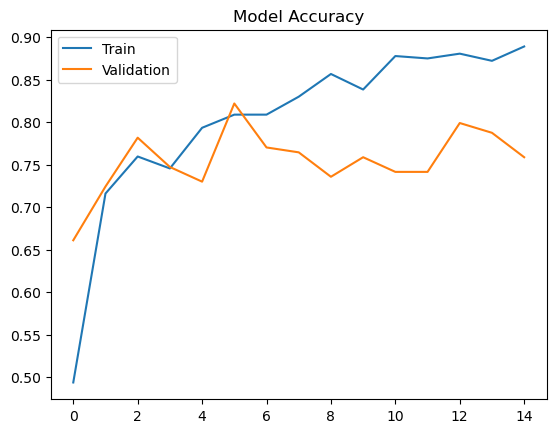

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.legend()
plt.show()


In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = r"C:\Users\USER\Desktop\Dataset\train\Bird-drop\Bird (11).jpg"
img = image.load_img(img_path, target_size=(224,224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)/255.0

pred = model.predict(img_array)
class_labels = list(train_generator.class_indices.keys())
print("Predicted:", class_labels[np.argmax(pred)])


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted: Clean


In [49]:
model.save('solar_fault_detection_model.h5')


In [45]:
import numpy as np
from tensorflow.keras.preprocessing import image

img_path = r"C:\Users\USER\Desktop\birdpee.jpg"
img = image.load_img(img_path, target_size=(224, 224))
img_array = np.expand_dims(image.img_to_array(img)/255.0, axis=0)

pred = model.predict(img_array)
labels = ['Bird-drop', 'Clean', 'Dusty', 'Electrical-damage', 'Physical-Damage', 'Snow-Covered']
print("Predicted Class:", labels[np.argmax(pred)])


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Predicted Class: Bird-drop


In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(val_generator.classes, y_pred))
print('Classification Report')
print(classification_report(val_generator.classes, y_pred, target_names=val_generator.class_indices.keys()))


6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step  
Confusion Matrix
[[ 3  5 11  8  4 10]
 [ 6  9  8  3  7  5]
 [11  8  6  3  2  8]
 [ 7  3  4  4  0  2]
 [ 2  3  5  0  2  1]
 [ 4  6  7  2  1  4]]
Classification Report
                   precision    recall  f1-score   support

        Bird-drop       0.09      0.07      0.08        41
            Clean       0.26      0.24      0.25        38
            Dusty       0.15      0.16      0.15        38
Electrical-damage       0.20      0.20      0.20        20
  Physical-Damage       0.12      0.15      0.14        13
     Snow-Covered       0.13      0.17      0.15        24

         accuracy                           0.16       174
        macro avg       0.16      0.16      0.16       174
     weighted avg       0.16      0.16      0.16       174



In [22]:
    pip install streamlit


In [30]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model("solar_fault_detection_model.h5")

# Recompile it (even if not training again)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("Model recompiled successfully!")


Model recompiled successfully!


In [31]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='absl')


In [46]:
!pip install gradio


In [47]:
from tensorflow.keras.models import load_model
import tensorflow as tf
import numpy as np
from PIL import Image
import gradio as gr

# Load the model
model = load_model("solar_fault_detection_model.h5")

# Define class names
class_names = ["Bird-drop", "Clean", "Dusty", "Electrical-damage", "Physical-Damage", "Snow-Covered"]

# Preprocessing function
def preprocess_image(image):
    image = image.resize((224, 224))  # resize same as your training
    img_array = np.array(image) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Prediction function
def predict(img):
    processed = preprocess_image(img)
    prediction = model.predict(processed)
    index = np.argmax(prediction)
    confidence = float(np.max(prediction))
    return {class_names[index]: confidence}


In [48]:
interface = gr.Interface(
    fn=predict,
    inputs=gr.Image(type="pil"),
    outputs=gr.Label(num_top_classes=1),
    title="Solar Panel Fault Detection",
    description="Upload a solar panel image to detect its condition.",
)

interface.launch()


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


In [52]:
import os
for file in os.listdir():
    if file.endswith(".h5"):
        print(file)

solar_fault_detection_model.h5


In [53]:
model.save('solar_fault_detection_model.h5')


In [54]:
model.save('sfdm.h5')